NUMERICAL ANALYSIS OF HISTORIC DATA WITH POSSIBLE RESULTS FOR RESPECTIVE USERS FUTURE INVESTMENTS 

**NUMERICAL ANALYSIS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files
files.upload()

Saving ^GSPC.csv to ^GSPC.csv


{'^GSPC.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2019-10-04,2918.560059,2953.739990,2918.560059,2952.010010,2952.010010,2990830000\n2019-10-07,2944.229980,2959.750000,2935.679932,2938.790039,2938.790039,2940140000\n2019-10-08,2920.399902,2925.469971,2892.659912,2893.060059,2893.060059,3356450000\n2019-10-09,2911.100098,2929.320068,2907.409912,2919.399902,2919.399902,2726820000\n2019-10-10,2918.550049,2948.459961,2917.120117,2938.129883,2938.129883,3217250000\n2019-10-11,2963.070068,2993.280029,2963.070068,2970.270020,2970.270020,3580460000\n2019-10-14,2965.810059,2972.840088,2962.939941,2966.149902,2966.149902,2557020000\n2019-10-15,2973.610107,3003.280029,2973.610107,2995.679932,2995.679932,3340740000\n2019-10-16,2989.679932,2997.540039,2985.199951,2989.689941,2989.689941,3222570000\n2019-10-17,3000.770020,3008.290039,2991.790039,2997.949951,2997.949951,3115960000\n2019-10-18,2996.840088,3000.000000,2976.310059,2986.199951,2986.199951,3264290000\n2019-10-21,2996.479980,3007.

In [ ]:
df=pd.read_csv('^GSPC.csv')
df.dataframeName = '^GSPC.csv'


In [ ]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime
# The tech stocks we'll use for this analysis
tech_list = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,3102.382974,3124.189321,3077.941942,3102.843449,3102.843449,4.669620e+09
std,248.007299,237.724473,259.013304,248.238655,248.238655,1.453412e+09
min,2290.709961,2300.729980,2191.860107,2237.399902,2237.399902,1.296540e+09
25%,2972.695068,2996.475036,2963.037536,2977.162537,2977.162537,3.673375e+09
50%,3137.414917,3149.585083,3118.104981,3130.705078,3130.705078,4.254600e+09
75%,3282.285034,3293.664978,3264.859924,3283.277404,3283.277404,5.233698e+09
max,3564.739990,3588.110107,3535.229980,3580.840088,3580.840088,9.044690e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


Text(0.5, 1.0, 'Low')

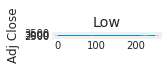

In [ ]:
# Let's see a historical view of the closing price


plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

plt.subplot(6, 6, 3)
df['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"{tech_list[2]}")

Text(0.5, 1.0, 'Close')

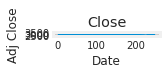

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.subplot(6, 6, 1)
df['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel('Date')
plt.title(f"{tech_list[3]}")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



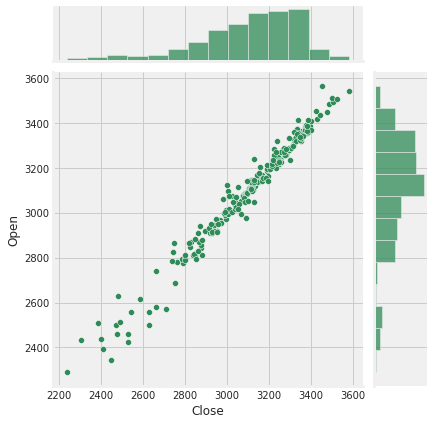

In [ ]:
sns.jointplot(df['Close'], df['Open'], tech_list , kind='scatter', color='seagreen')

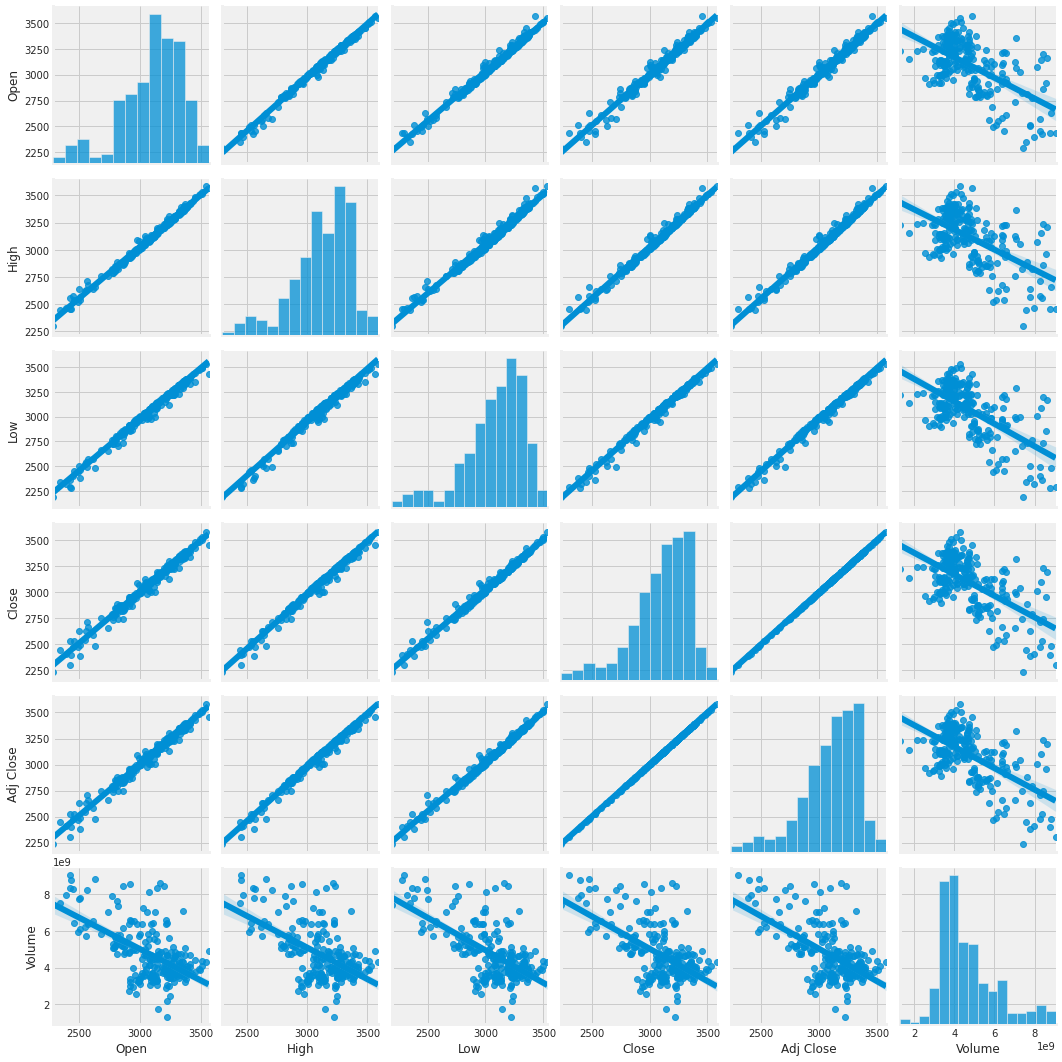

In [ ]:
sns.pairplot(df, kind='reg')

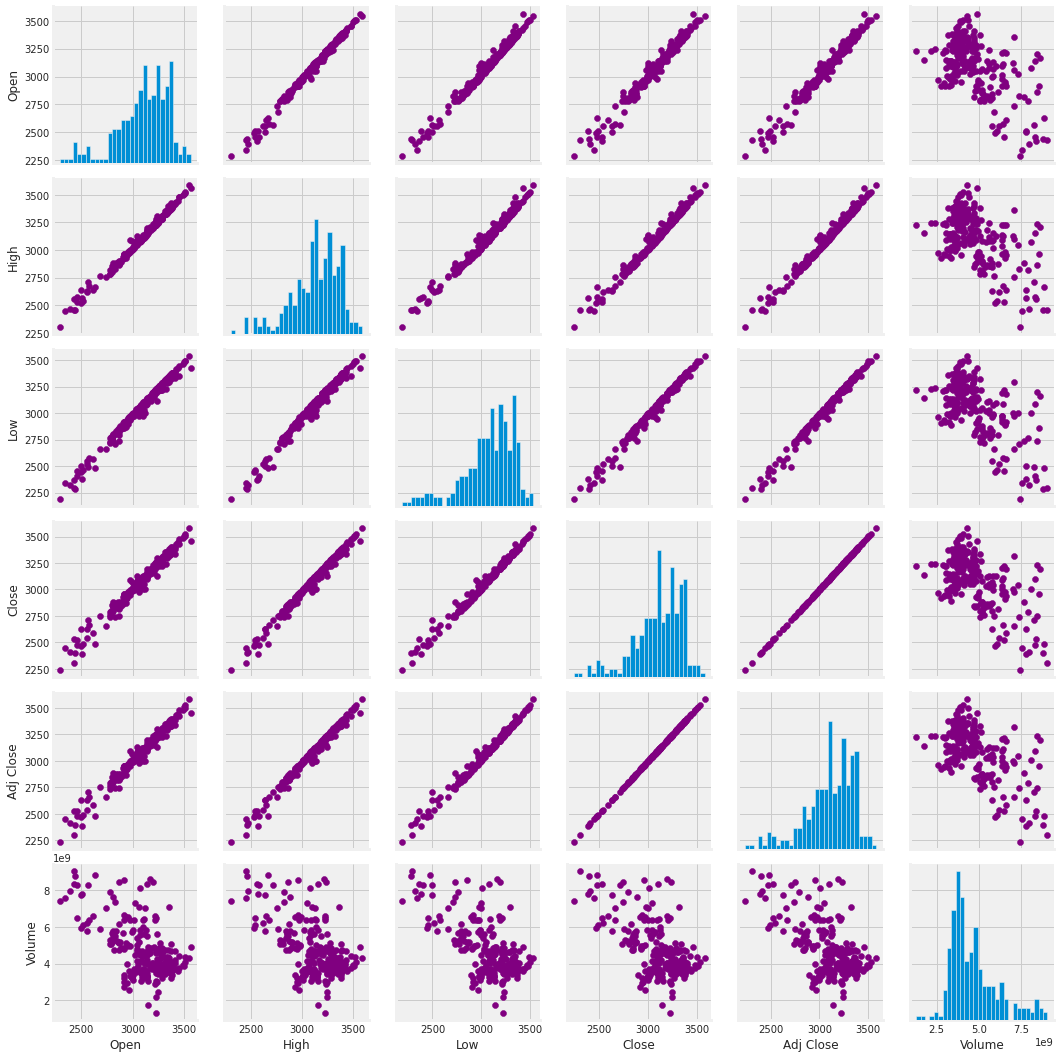

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# Using map_lower we can specify what the lower triangle will look like.
return_fig.map_lower(plt.scatter, color='purple')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

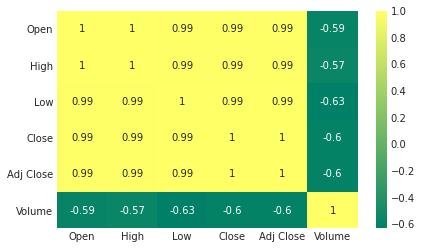

In [ ]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(df.corr(), annot=True, cmap='summer')

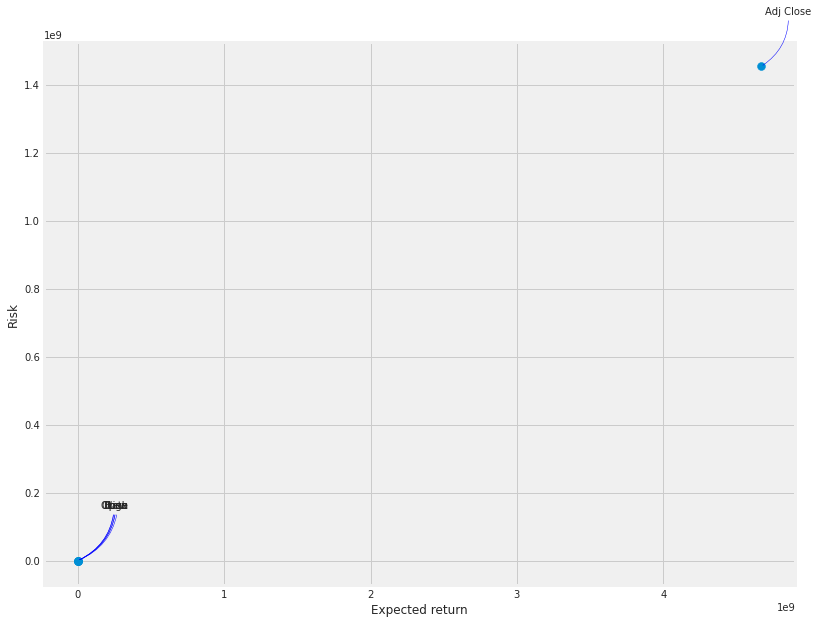

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_list DataFrame
rets = df.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(df.mean(), df.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(df.columns, df.mean(), df.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

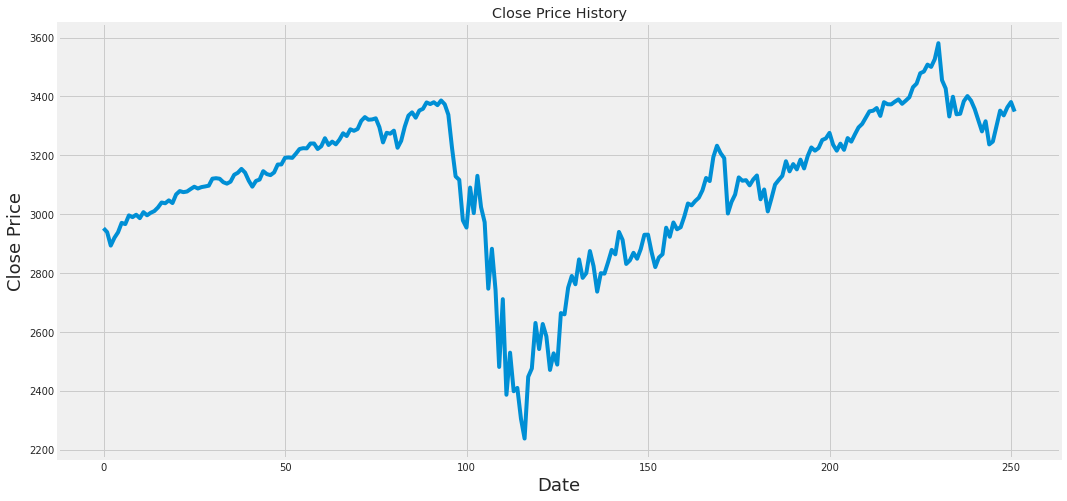

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = df.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

202

SENTIMENTAL ANALYSIS OF THE PAST HEADLINES FOR USER ASSESMENT

**SENTIMENT ANALYSIS**

In [ ]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim


# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# DATASET
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

data=pd.read_csv("https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/DPQMQH/P2Z4PM")

In [ ]:
print("Dataset size:", len(data))

Dataset size: 3297172


In [ ]:
data.head(5)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


Text(0.5, 1.0, 'Dataset labels distribuition')

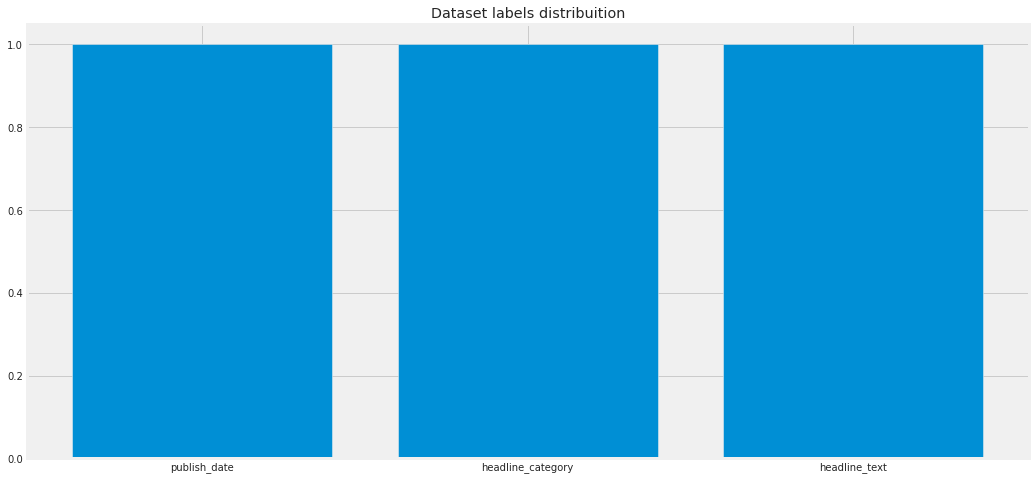

In [ ]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

target_cnt = Counter(data)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [ ]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)
   

**SPLIT TRAIN AND TEST**

In [ ]:
df_train, df_test = train_test_split(data, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 2637737
TEST size: 659435


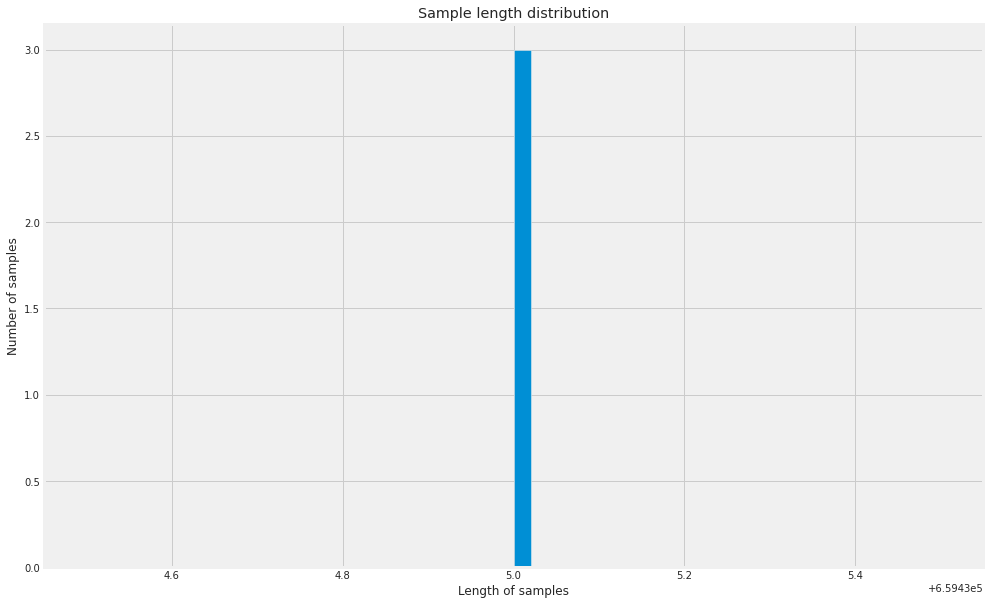

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist([len(df_test) for sample in list(df_train)], 50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

In [ ]:
print(df_train.shape)
print(df_test.shape)


(2637737, 3)
(659435, 3)


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2637737 entries, 2460410 to 2219110
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 80.5+ MB


In [ ]:
df_train.dropna(inplace=True)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659435 entries, 1357995 to 722104
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   publish_date       659435 non-null  int64 
 1   headline_category  659435 non-null  object
 2   headline_text      659435 non-null  object
dtypes: int64(1), object(2)
memory usage: 20.1+ MB


In [ ]:
df_train.describe()

,publish_date
count,2.637737e+06
mean,2.012470e+07
std,4.897002e+04
min,2.001010e+07
25%,2.009101e+07
50%,2.013071e+07
75%,2.016110e+07
max,2.020063e+07


In [ ]:
temp = df_train.groupby('headline_category').count()['headline_text'].reset_index().sort_values(by='headline_text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,headline_category,headline_text
473,india,228227
958,unknown,166440
177,city.mumbai,105903
148,city.delhi,99609
107,business.india-business,92002
143,city.chandigarh,86059
157,city.hyderabad,79022
140,city.bengaluru,73767
350,entertainment.hindi.bollywood,72191
133,city.ahmedabad,68700


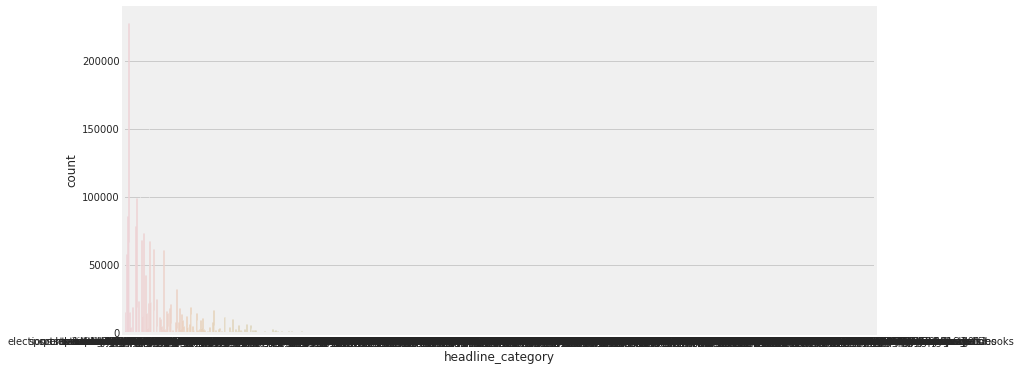

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='headline_category',data=df_train)

In [ ]:
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


fig = go.Figure(go.Funnelarea(
    text =temp.headline_category,
    values = temp.headline_text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()


In [ ]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))
results_jaccard=[]

for ind,row in df_train.iterrows():
    sentence1 = row.headline_text
    sentence2 = row.headline_category

    jaccard_score = jaccard(sentence1,sentence2)
    results_jaccard.append([sentence1,sentence2,jaccard_score])
jaccard = pd.DataFrame(results_jaccard,columns=["headline_text","headline_category","jaccard_score"])
df_train = df_train.merge(jaccard,how='outer')
df_train['Num_words_ST'] = df_train['headline_text'].apply(lambda x:len(str(x).split())) #Number Of words in Selected Text
df_train['Num_word_text'] = df_train['headline_text'].apply(lambda x:len(str(x).split())) #Number Of words in main text
df_train['difference_in_words'] = df_train['Num_word_text'] - df_train['Num_words_ST'] #Difference in Number of words text and Selected Text
df_train.head()

,publish_date,headline_category,headline_text,temp_list,jaccard_score,Num_words_ST,Num_word_text,difference_in_words
0,20161014,sports.cricket.south-africa-in-australia,Mark Taylor says six Australia Test spots up f...,"[Mark, Taylor, says, six, Australia, Test, spo...",0.0,10,10,0
1,20140929,city.kanpur,Man shot over land dispute; 3 held,"[Man, shot, over, land, dispute;, 3, held]",0.0,7,7,0
2,20190725,city.meerut,Five members of controversial PFI detained in ...,"[Five, members, of, controversial, PFI, detain...",0.0,11,11,0
3,20160903,entertainment.hindi.bollywood,Ranbir Kapoor gets competitive?,"[Ranbir, Kapoor, gets, competitive?]",0.0,4,4,0
4,20150828,city.chennai,Jennifer looked picture-perfect at Nalmanam's ...,"[Jennifer, looked, picture-perfect, at, Nalman...",0.0,13,13,0


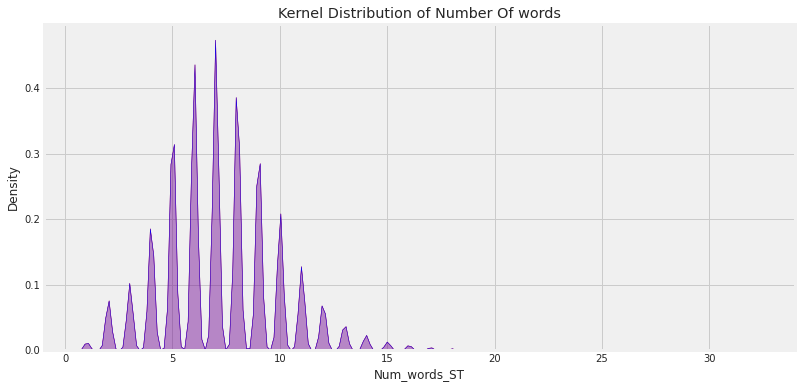

In [ ]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(df_train['Num_words_ST'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')
p1=sns.kdeplot(df_train['Num_word_text'], shade=True, color="b")

In [ ]:
k = df_train[df_train['Num_word_text']<=2]
k.groupby('headline_category').mean()['jaccard_score']

headline_category
2010-stars                         0.0
actresses                          0.0
ad-links                           0.0
afghan-children                    0.0
ahmedabad-times                    0.0
                                  ... 
world.us                           0.0
years-headline-makers              0.0
years-young-achievers              0.0
young-india-votes.deep-focus       0.0
young-india-votes.talking-point    0.0
Name: jaccard_score, Length: 356, dtype: float64

**Most Common words in our Target-Selected Text**

In [ ]:
df_train['temp_list'] = df_train['headline_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,to,672867
1,in,552073
2,for,374162
3,of,285192
4,on,245262
5,a,140681
6,at,127176
7,the,124865
8,with,98584
9,from,86141


In [ ]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
from google.colab import files
files.upload()

Saving headlines.jpg to headlines (1).jpg


{'headlines.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x13\x12\x13\x12\x13\x13\x15\x16\x15\x17\x19\x1e\x1b\x19\x18\x18\x18\x1e\x1d\x1d\x1a \x1f\x1d"! \x1e\x1f\x1e\x1b\x1f)# \x1f% #!!1!%--...\x1f!683,7(-.+\x01\n\n\n\x0e\r\x0e\x1b\x10\x10\x1b/&\x1f%-/2---+2+/+/0-///0-/---5-----//--------/----------\xff\xc0\x00\x11\x08\x00\xab\x01&\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x01\x00\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x06\x03\x07\x02\x01\x08\xff\xc4\x00M\x10\x00\x02\x01\x03\x03\x02\x04\x03\x04\x03\x0c\x07\x05\t\x00\x00\x01\x02\x03\x00\x04\x11\x05\x12!\x131\x06"AQ\x142a\x07#q\x81B\x91\xa1\x08\x15$35Rbt\x92\xb1\xb2\xb3Cr\x82\xa2\xc1\xd1\xe1%46s\xc2\x16cde\x84\x93\xc3\xd2\xf1\xff\xc4\x00\x18\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x01\x03\x04\xff\xc4\x00/\x11\x00\x02\x02\x00\x04\x04\x05\x03\x04\x03\x01\x00\x00\x00\x00\x00\x00\x01\x02\x11\x03\x12

In [ ]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d='headlines.jpg'

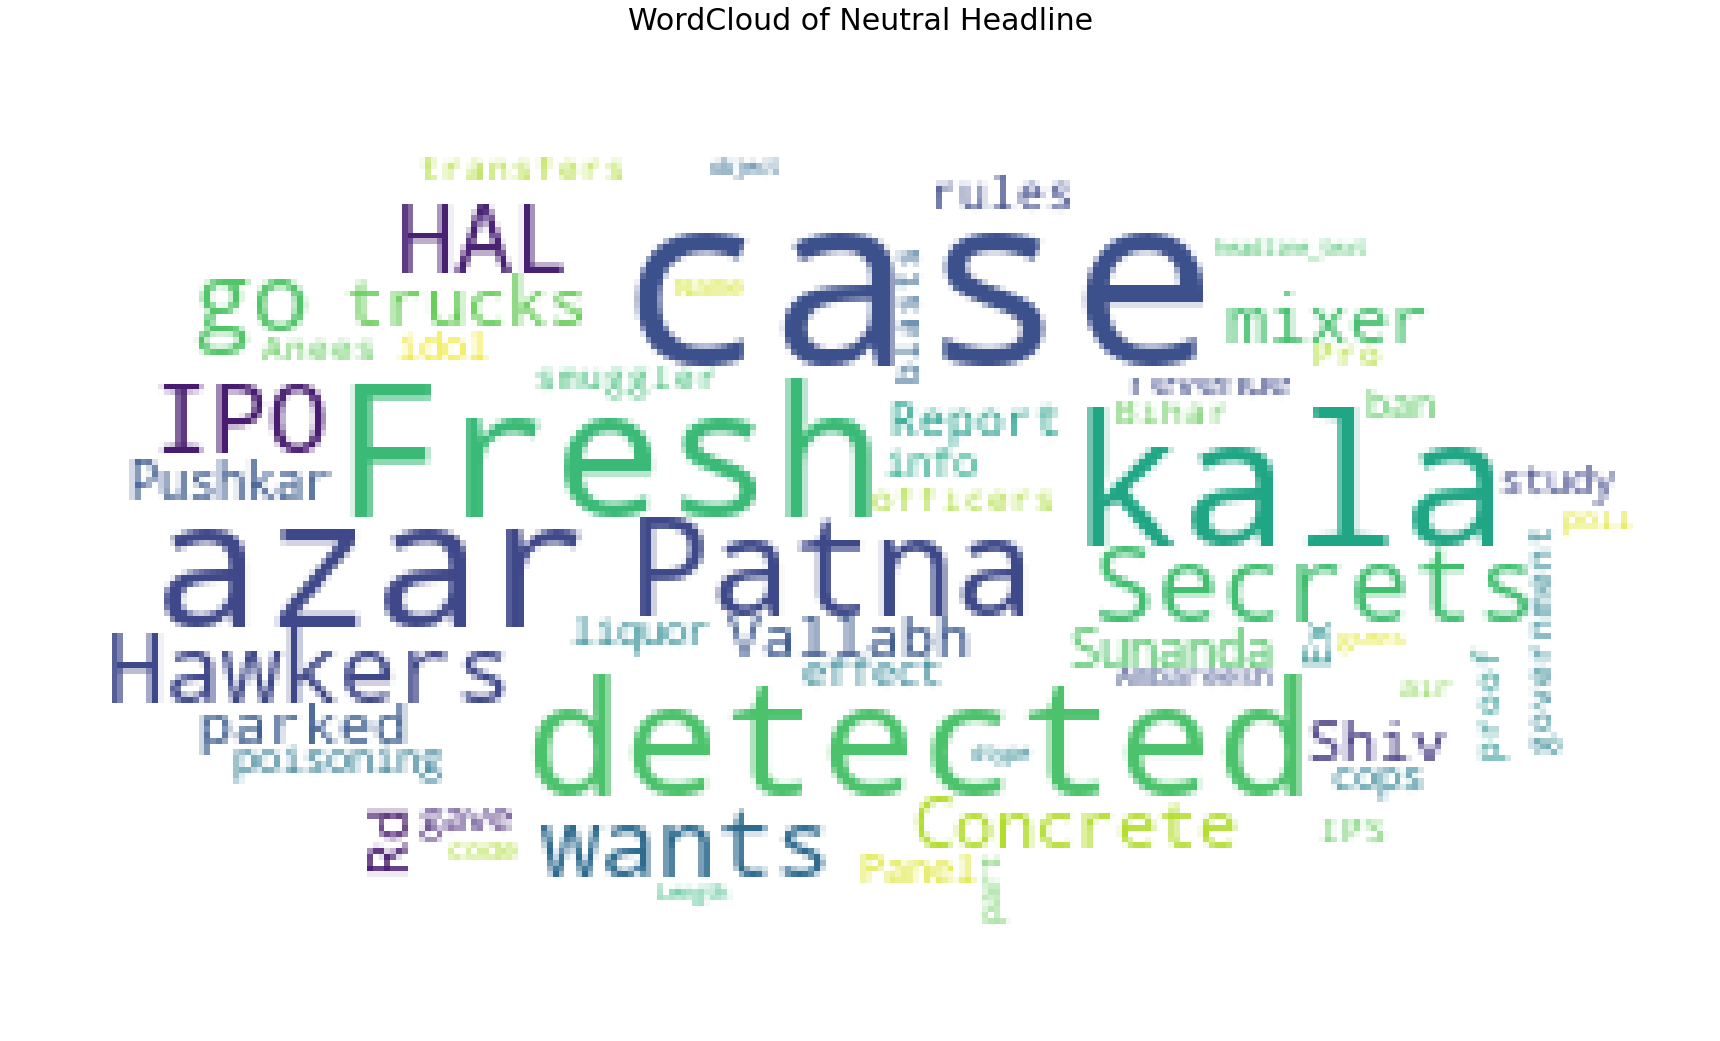

In [ ]:
pos_mask = np.array(Image.open(d))
plot_wordcloud(df_test.headline_text,mask=pos_mask,color='white',max_font_size=100,title_size=30,title="WordCloud of Neutral Headline")

**Combining the findings to create a hybrid model**

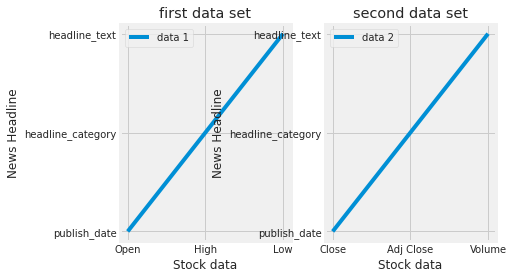

In [ ]:
x_data1 = ['Open',	'High',	'Low'	]
y_data1 = ['publish_date',	'headline_category',	'headline_text']

x_data2 = ['Close',	'Adj Close', 'Volume']
y_data2 = ['publish_date',	'headline_category',	'headline_text']

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(x_data1, y_data1, label='data 1')
ax2.plot(x_data2, y_data2, label='data 2')
ax1.set_xlabel('Stock data')
ax1.set_ylabel('News Headline')
ax1.set_title('first data set')
ax1.legend()
ax2.set_xlabel('Stock data')
ax2.set_ylabel('News Headline')
ax2.set_title('second data set')
ax2.legend()

plt.show()